# **Assignment 1**, **dataset 3**


# Problem statement
https://archive.ics.uci.edu/dataset/73/mushroom

Additional Information

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

### Loading the dataset

In [191]:
!pip install ucimlrepo

21813.60s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [192]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [193]:
# fetch dataset
mushrooms = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushrooms.data.features
y = mushrooms.data.targets

# metadata
print(mushrooms.metadata)

# variable information
print(mushrooms.variables)

# Make sure to split the data for validation

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

## **Exploratory Data Analysis**

The student will have to make a written analysis of the data being loaded (depending on the dataset that was assigned to them). They should apply methods of inspecting the data and make some exploratory data analysis

### Understanding the dataset

The goal here is to understand the dataset and its values. This will lay the foundation of how to approach the data processing and transformation.

In [194]:
print("Features:")
print(X.columns)
X.head()


Features:
Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [195]:

y.groupby('poisonous').size()


poisonous
e    4208
p    3916
dtype: int64

Below we can see the type and the amount of non null values. What we notice here is that for the majority of our features there are no Null values. However, as we see for the `stalk-root` feature we have 5644 non-null values out of 8124 entries in our dataset.

In [196]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [197]:
mushrooms.variables

,name,role,type,demographic,description,units,missing_values
0,poisonous,Target,Categorical,None,None,None,no
1,cap-shape,Feature,Categorical,None,"bell=b,conical=c,convex=x,flat=f, knobbed=k,su...",None,no
2,cap-surface,Feature,Categorical,None,"fibrous=f,grooves=g,scaly=y,smooth=s",None,no
3,cap-color,Feature,Binary,None,"brown=n,buff=b,cinnamon=c,gray=g,green=r, pink...",None,no
4,bruises,Feature,Categorical,None,"bruises=t,no=f",None,no
5,odor,Feature,Categorical,None,"almond=a,anise=l,creosote=c,fishy=y,foul=f, mu...",None,no
6,gill-attachment,Feature,Categorical,None,"attached=a,descending=d,free=f,notched=n",None,no
7,gill-spacing,Feature,Categorical,None,"close=c,crowded=w,distant=d",None,no
8,gill-size,Feature,Categorical,None,"broad=b,narrow=n",None,no
9,gill-color,Feature,Categorical,None,"black=k,brown=n,buff=b,chocolate=h,gray=g, gre...",None,no


The information shown above says that the `cap-color` feature is a binary value. However, as we can see below(and in the table above), that is not true:

In [198]:
print(X.groupby('cap-color').size())

cap-color
b     168
c      44
e    1500
g    1840
n    2284
p     144
r      16
u      16
w    1040
y    1072
dtype: int64


Additionally we can see that the feature `stalk-root` could have missing values and that in the metadata table it shows that there are only 5644 values out of 8124 entries in the dataset.  



In [199]:
print(X["stalk-root"].value_counts())

print("Possible values for 'stalk-root':")
print(mushrooms.variables.values[11][4])

stalk-root
b    3776
e    1120
c     556
r     192
Name: count, dtype: int64
Possible values for 'stalk-root':
bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?


As can be seen above there is actually a value assigned to display missing values. That means we need to do some preprocessing of the data to change missing values to `?`

### Displaying the distribution of feature values to target

In order to see some sort of trend in the dataset, I have tried to display the different features to see if there are some features that have a clear indication that a particular value is primarily poisionous or edible.

As you can see in the graphs below, we can actually see some indications of feature values. As an example the feature `odor` is shown to an almost clear separation for all values of whether it is poisonous or edible. In contrast, veil-type(where only the value `p` is present in the dataset) almost have an even split between posinous and edible, making it almost unusable to use for prediction.

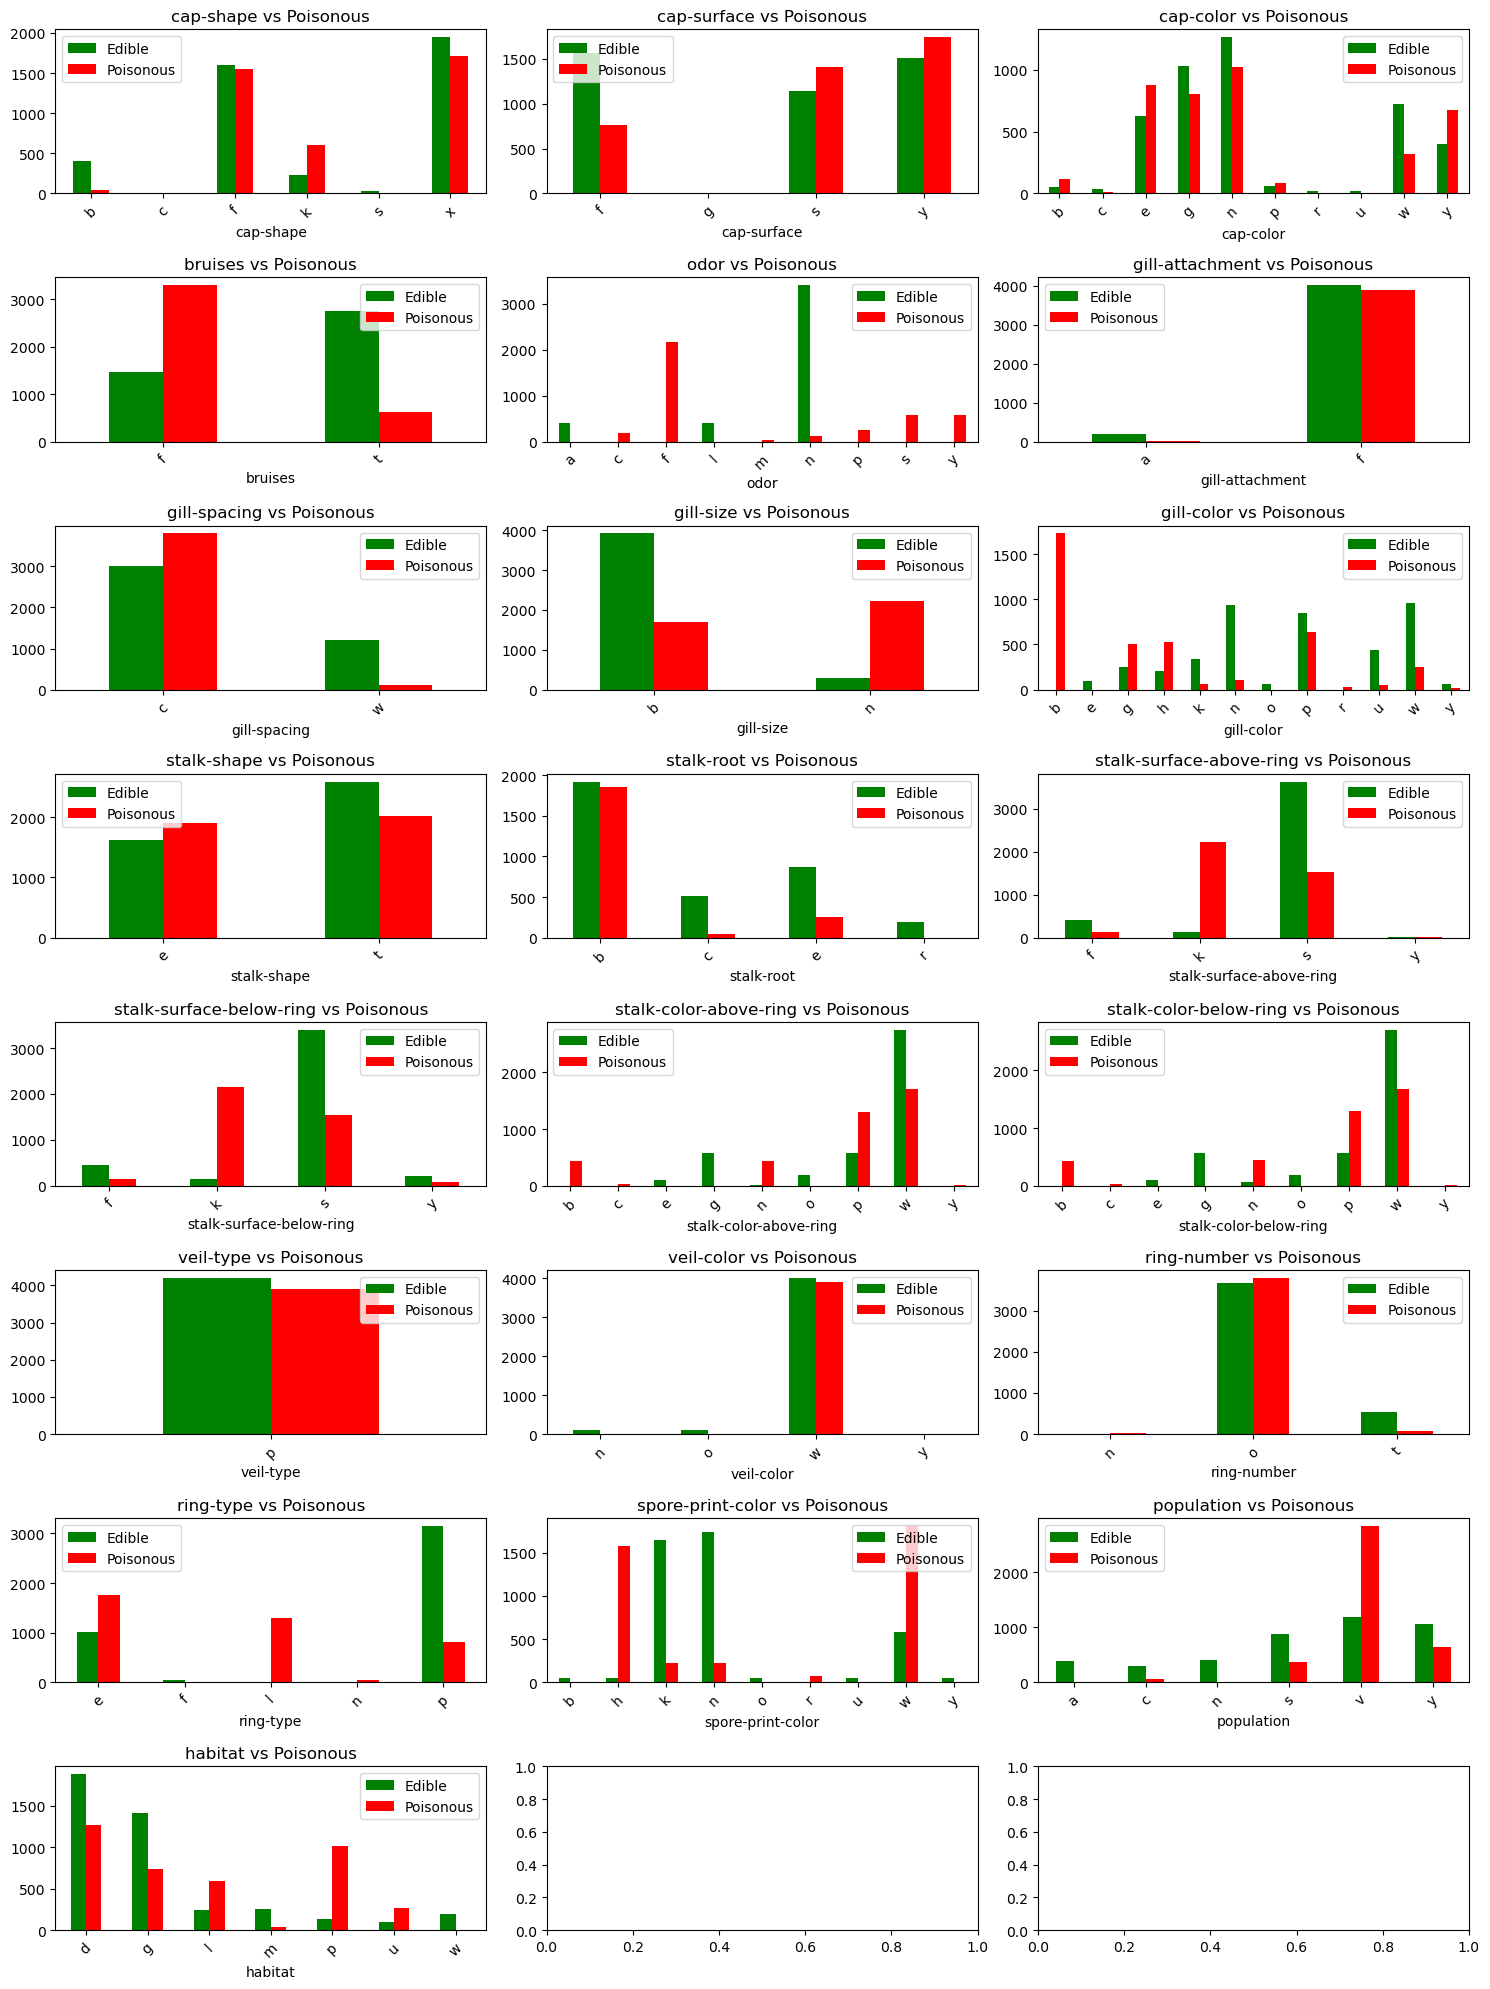

In [200]:

# Select a few key features to analyze
key_features = X.columns

fig, axes = plt.subplots(8, 3, figsize=(15, 20))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    # Create a crosstab to show poisonous vs edible by feature value
    crosstab = pd.crosstab(X[feature], y['poisonous'])
    crosstab.plot(kind='bar', ax=axes[i], color=['green', 'red'])
    axes[i].set_title(f'{feature} vs Poisonous')
    axes[i].set_xlabel(feature)
    axes[i].legend(['Edible', 'Poisonous'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [201]:
X.isnull().any().any()

np.True_

### Summary

Blab laablabsbaldb

## **Data Preprocessing**:

If applicable, the student will create new features from existing data to improve model performance and/or select the most relevant features for the model.

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import clone

### Getting the values that can appear for each feature

In [203]:
feature_values = {}
    
for i, feature in enumerate(mushrooms.variables.values):
    
    if feature[1] == 'Target':
        continue

    name = feature[0]
    raw_values = feature[4].split(",")

    values = []

    for raw_value in raw_values:
        values.append(raw_value.split('=')[1].strip())
    
    feature_values[name] = values

print(feature_values)


{'cap-shape': ['b', 'c', 'x', 'f', 'k', 's'], 'cap-surface': ['f', 'g', 'y', 's'], 'cap-color': ['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'], 'bruises': ['t', 'f'], 'odor': ['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'], 'gill-attachment': ['a', 'd', 'f', 'n'], 'gill-spacing': ['c', 'w', 'd'], 'gill-size': ['b', 'n'], 'gill-color': ['k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'], 'stalk-shape': ['e', 't'], 'stalk-root': ['b', 'c', 'u', 'e', 'z', 'r', '?'], 'stalk-surface-above-ring': ['f', 'y', 'k', 's'], 'stalk-surface-below-ring': ['f', 'y', 'k', 's'], 'stalk-color-above-ring': ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'], 'stalk-color-below-ring': ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'], 'veil-type': ['p', 'u'], 'veil-color': ['n', 'o', 'w', 'y'], 'ring-number': ['n', 'o', 't'], 'ring-type': ['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'], 'spore-print-color': ['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'], 'population': ['a', 'c', 'n', 's', 'v', 'y'], 'habitat': ['

### Fix missing values in `stalk-root`

In [ ]:

X_processed = X.copy()

X_processed['stalk-root'] = X_processed['stalk-root'].map(lambda x: '?' if pd.isnull(x) else x)

print(X_processed["stalk-root"].value_counts())


stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64


### Convert categorical values to one-hot encoding

Since we deal with categorical data we need to change it to integers in order for our models to be able to train and predict.

I have chosen to create a column transformer, such that i can add it to the Scikit pipeline later.

In [ ]:
categories_list = [feature_values[col] for col in X_processed.columns]
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(categories=categories_list, sparse_output=False, drop='if_binary'), X_processed.columns)
    ])


test_preprocessor = clone(preprocessor)

X_example = pd.DataFrame(test_preprocessor.fit_transform(X_processed), columns=preprocessor.get_feature_names_out())

print("Processed DataFrame:")
X_example.info()
print("--------")
print(f"Length of the preprocessed dataset: {len(X_example)}")
X_example.head()


NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Change categorical values for the label to a binary value

In [ ]:

y_processed = y.copy()

y_processed["poisonous"] = y_processed["poisonous"].map(lambda x: int(1) if x == "p" else int(0))

y_processed.value_counts()


poisonous
0            4208
1            3916
Name: count, dtype: int64

## **Data Transformation**

The student should prepare the data for the training. Augmenting, splitting, and otherwise transforming should be done here.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, stratify=y_processed["poisonous"], random_state=1023)

X_train = pd.DataFrame(X_train, columns=X_processed.columns)
X_test = pd.DataFrame(X_test, columns=X_processed.columns)

X_train.isnull().any()

cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

### Reducing dimensionality

Since we have many features to deal with, I will use Principal Component Analysis (PCA) to reduce the amount of dimensions.

In [ ]:
from sklearn.decomposition import PCA


def get_num_components(data, variance_threshold=0.95):
    """
    Determine the number of components to keep based on the explained variance ratio.
    
    :param variance_threshold: The cumulative explained variance ratio threshold.
    :return: The number of components to keep.
    """
    pca = PCA()
    pca.fit(data)

    for i, variance_ratio in enumerate(np.cumsum(pca.explained_variance_ratio_)):
        if variance_ratio >= variance_threshold:
            return i + 1

    return None

num_components = get_num_components(X_example, variance_threshold=0.95)
print(f"Number of components to keep: {num_components}")


Number of components to keep: 41


## **Model Selection**


The student should implement a simple model as a baseline to compare more complex models. The student should try more complex modes and justify their rejection or acceptance.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


## Logistic Regression

In [ ]:
logistic_regression_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ('classifier', LogisticRegression( random_state=42))
])

logistic_regression_pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(categories=[['b',
                                                                             'c',
                                                                             'x',
                                                                             'f',
                                                                             'k',
                                                                             's'],
                                                                            ['f',
                                                                             'g',
                                                                             'y',
                                                                             's'],
                                                                            ['n',
                                                                             'b',
                                                                             'c',
                                                                             'g',
                                                                             'r',
                                                                             'p',
                                                                             'u',
                                                                             'e',
                                                                             'w',
                                                                             'y'],
                                                                            ['t',
                                                                             'f'],
                                                                            ['a',
                                                                             'l',
                                                                             'c',
                                                                             'y',
                                                                             'f',
                                                                             'm',
                                                                             'n',
                                                                             'p',
                                                                             's'],
                                                                            ['a',
                                                                             'd',
                                                                             'f',
                                                                             'n'],
                                                                            ['c',
                                                                             'w',
                                                                             'd'],
                                                                            ['b',
                                                                             'n'],
                                                                            ['k',
                                                                             'n',
                                                                             'b',
                                                                             'h',
                                                                             'g',
                                                                             'r',
                                                                             'o',
                                               

### LogisticRegression (With PCA)

In [ ]:
logistic_regression_pca_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ('pca', PCA(n_components=num_components)),
    ('classifier', LogisticRegression())
])

logistic_regression_pca_pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('pca', PCA(n_components=40)),
                ('classifier', LogisticRegression())])

## Random Forest


In [ ]:
num_estimators = 10

### RandomForestClassifier (Without PCA)

In [ ]:
random_forest_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=num_estimators, random_state=42))
])

random_forest_pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('classifier',
                 RandomForestClassifier(n_estimators=10, random_state=42))])

### RandomForestClassifier (With PCA)

In [ ]:
random_forest_pca_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ('pca', PCA(n_components=num_components)),
    ('classifier', RandomForestClassifier(n_estimators=num_estimators, random_state=42))
])

random_forest_pca_pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('pca', PCA(n_components=40)),
                ('classifier',
                 RandomForestClassifier(n_estimators=10, random_state=42))])

## **Reporting the results**

The student should report the results. Identify which features are most influential in the model’s predictions, if applicable for the dataset and model used.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

def evaluate_classifier(model, X_test, y_test, title="Classifier Evaluation"):
    title_display = f"------ {title} ------"
    print(title_display)
    predictions = model.predict(X_test)

    # Show a classification report
    classification_report_result = classification_report(y_test, predictions)
    print("Classification Report:")
    print(classification_report_result)
    
    # Display a confusion matrix of the predictions
    confusion_matrix_result = confusion_matrix(y_test, predictions)
    cm_plot = ConfusionMatrixDisplay(confusion_matrix_result, display_labels=["Edible", "Poisonous"])
    cm_plot.plot()
    plt.title(title)
    plt.show()

    # Show the feature importances
    if hasattr(model.named_steps['classifier'], 'feature_importances_'):
        importances = model.named_steps['classifier'].feature_importances_
        
        # Check if PCA was used
        if 'pca' in model.named_steps:
            feature_names = [f'PC{i+1}' for i in range(len(importances))]
            title_text = "Principal Component Importances"
        else:
            feature_names = X_test.columns
            title_text = "Feature Importances"
            
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(20, 12))
        plt.title(title_text)
        plt.bar(range(len(importances)), importances[indices], align='center')
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()

    print(len(title_display) * "-")

### Logistic Regression Results

------ Logistic Regression ------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



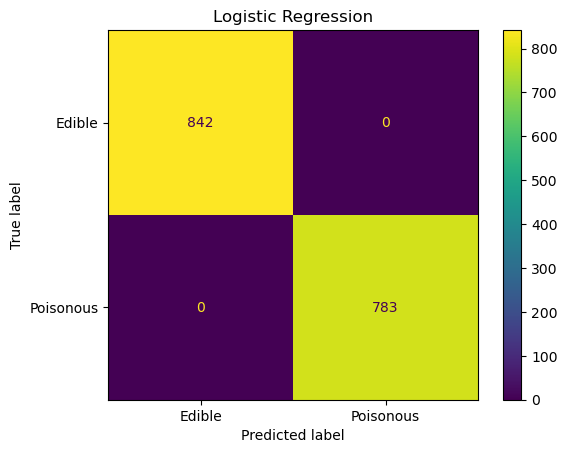

---------------------------------
------ Logistic Regression (With PCA) ------
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       842
           1       0.99      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



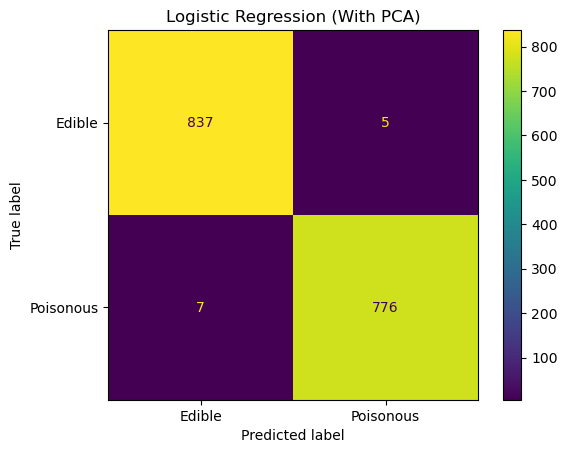

--------------------------------------------


In [ ]:
evaluate_classifier(logistic_regression_pipeline, X_test, y_test, title="Logistic Regression")
evaluate_classifier(logistic_regression_pca_pipeline, X_test, y_test, title="Logistic Regression (With PCA)")


### Random Forest Classifier

------ Random Forest ------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



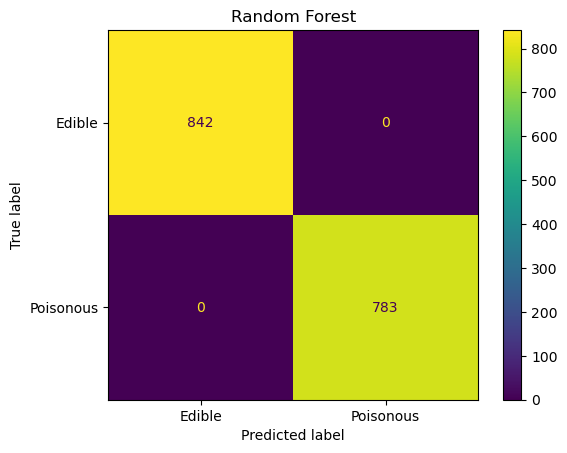

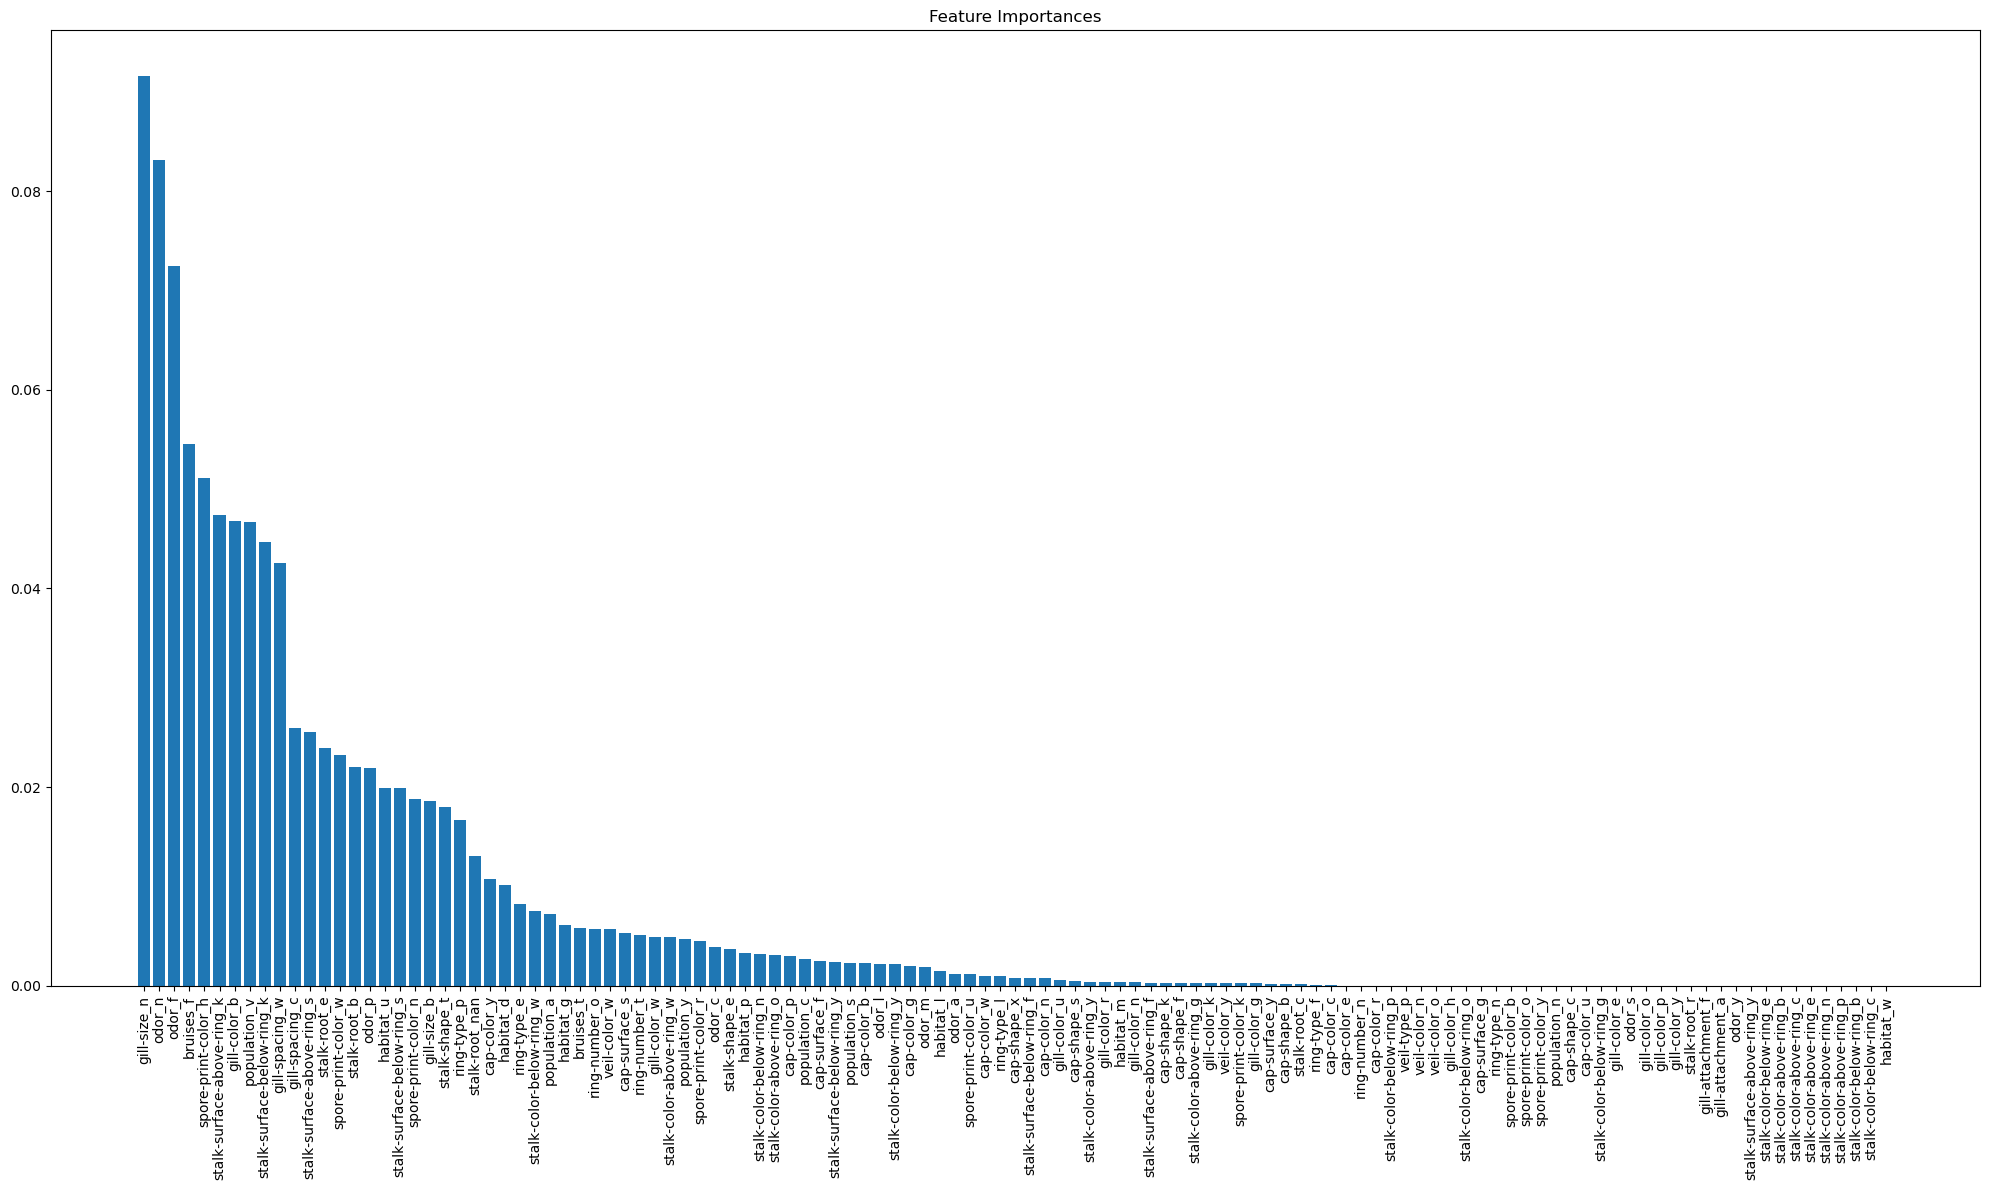

---------------------------
------ Random Forest (With PCA) ------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



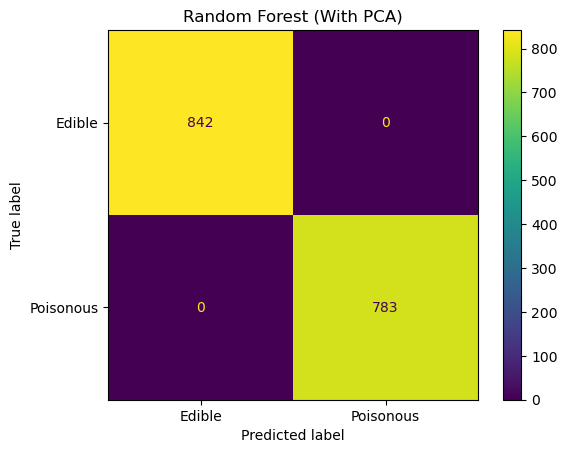

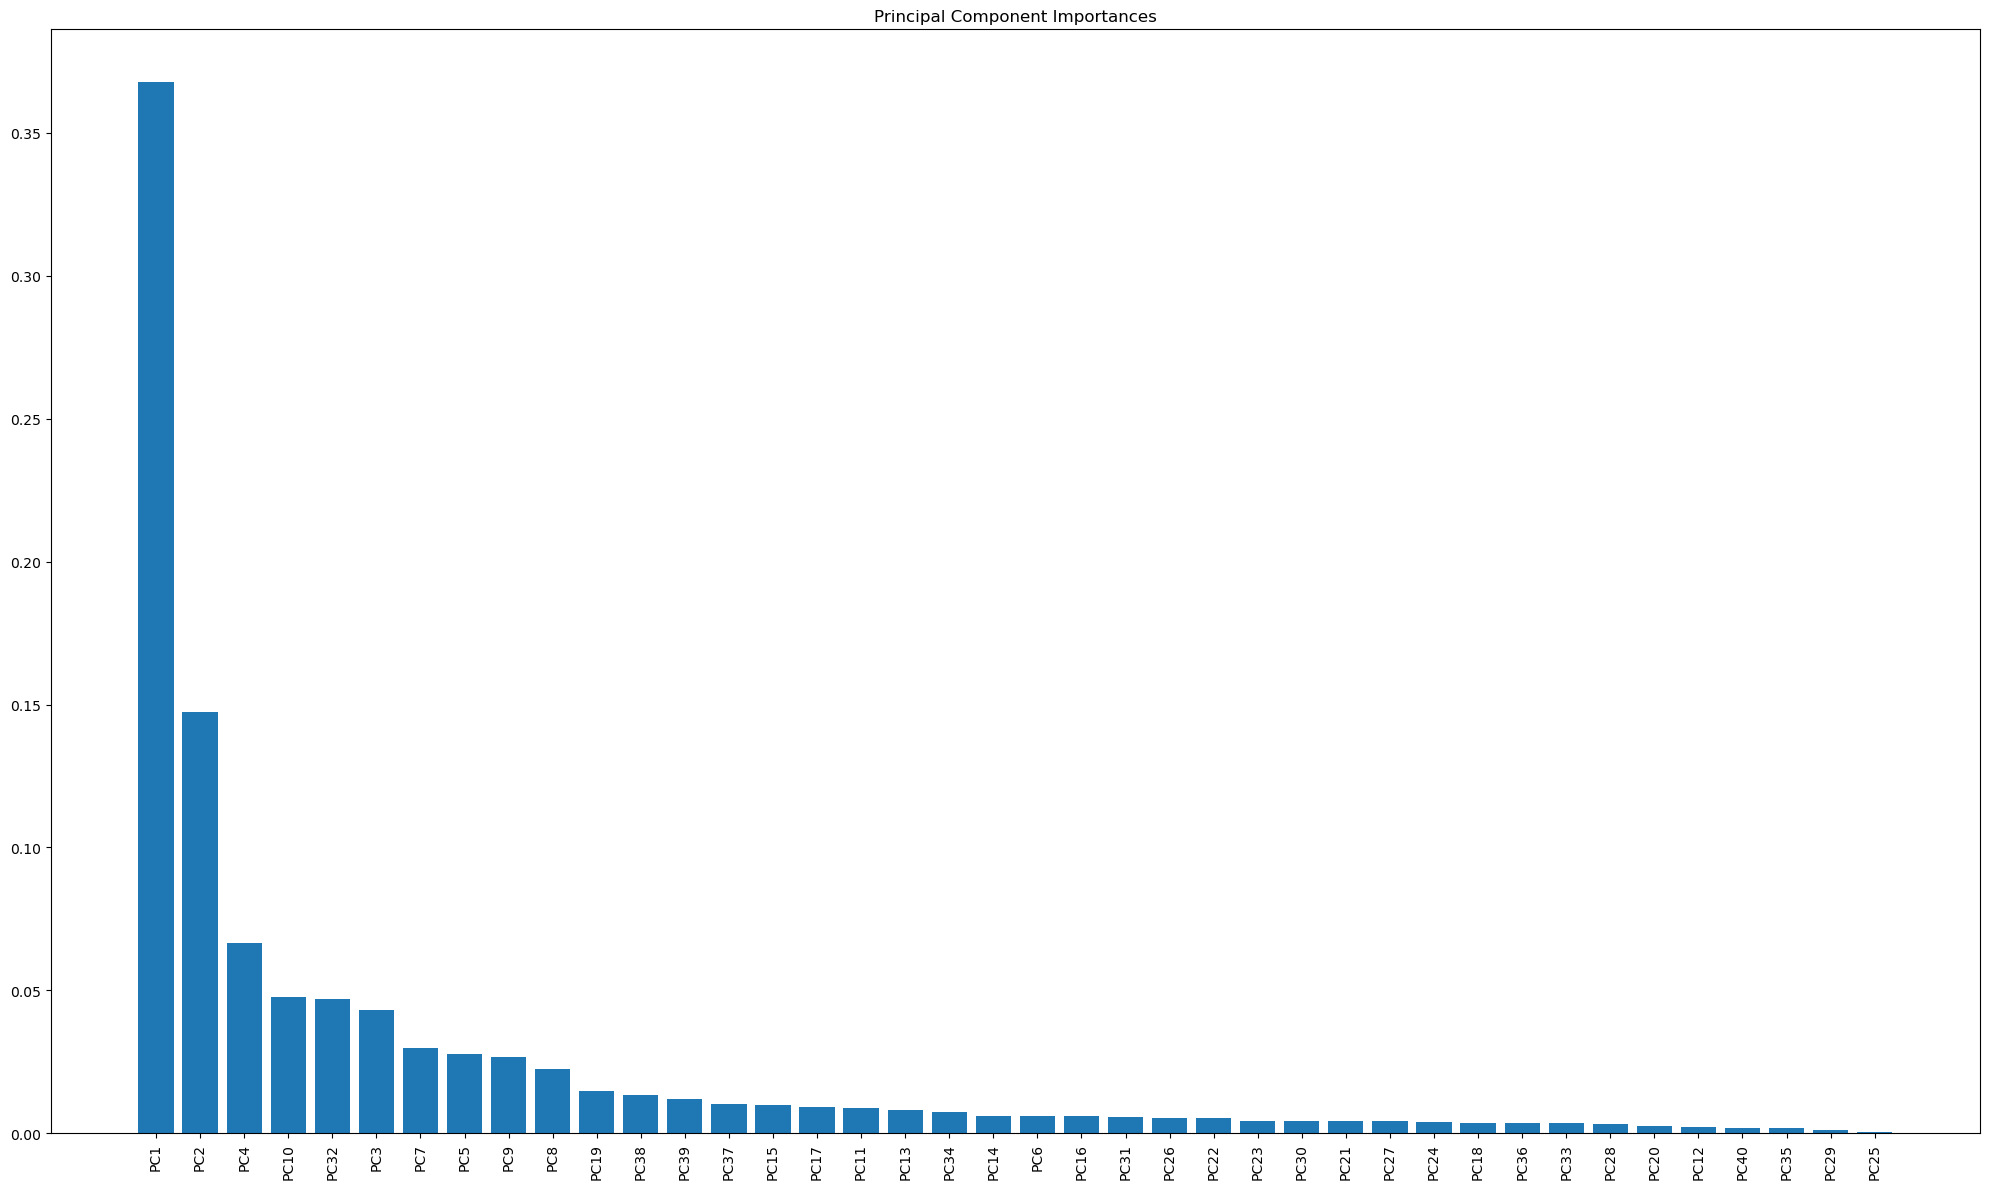

--------------------------------------


In [ ]:
evaluate_classifier(random_forest_pipeline, X_test, y_test, title="Random Forest")
evaluate_classifier(random_forest_pca_pipeline, X_test, y_test, title="Random Forest (With PCA)")

**Extra**: Any additional discussion and extra work relevant for solving the problem is welcome by the student and will contribute to a better grade.

# Summary

So just to summarize what I have done in the assignmment:

### Getting to know the data

I have displayed the data to gain an understanding of the value types and which kind of value each feature can have. As can be seen most of them are categorial, and some are binary. 

I noticed that the data summary when fetch the data(the second code cell) that `cap-color` is not binary even though it says so. 

Addtionally all feature and label values is a single letter.

### Pre-processing data

In order for the classification model to work, the data had to be changed. Since all of them are categorical or binary with letter values, we can use one-hot bitencoding to change it to a interger value(as stated in the *Hands On Machine Learning with SciKit-Learn, Keras & TensorFlow* on page 67).

This obviously increases the amount of features that the dataset contains i.e. 117 features.

### Data transformation and Model selection

Since the data contains 117 features, I thought that the model may have too many features to consider (running into the curse of dimensionality). For that reason, I wanted to reduce the number of features while still maintaining the majority of the variance. 

Since there were a lot of features I had a difficult time trying to visualize which features that could be discarded.
For that reason Principal Component Analysis (PCA) seemed like the best solution. Using the `PCA` class from `sklearn`, I could create a function(see `get_num_components()`) that finds the amount of components that the PCA class has to use in order to keep a certain amount of variance. 

In order to find a good model for binary classification, I choose to use Logisitc Regression and for a more extensive and complex model i choose to use the Random Forest Classifier and a custom Neural Network.

All models runs with and without PCA as a transformation step before fitting and prediction. You can see a list below which configurations we have:

| Name |  Model  |  Dimensionality Reduction  |
|--|   ---|---|
|logistic_regression_pipeline| Logistic Regression |  None  |
| logistic_regression_pca_pipeline|   Logistic Regression   | PCA  |
| random_forrest_pipeline| Random Forest Classifier     | None  |
| random_forrest_pca_pipeline| Random Forest Classifier     | PCA  |

### Evaluation

The results can be seen in the evaluation section above. Want i do want to explain is that it seems that the `RandomForestClassifier` performing exceptionally both with and without PCA. For the `LogisticRegression` models we can see a slight difference from the model with and without PCA. The LogisticRegression model using PCA seems to be predicting with less accuracy whereas the some model without PCA performs better on the test set.

Seeing these results, I of course were afraid that it may have been overfitting. However, since the test dataset is completly separate, this does not seem to be the case. It just performs well. 

**I have not done this yet... but might be a good idea to see that it does not overfit the training set.**

However, to be certain i have used K-fold and trained the models on each fold and used the best performing option.



